In [31]:
from pathlib import Path

import pandas as pd
from matplotlib import pyplot as plt

to_icm = 33.356

plt.style.use("../paper_small.mplstyle")


Path().absolute()

PosixPath('/Users/flokno/working/projects/tdep/Raman/paper_raman_data/figure_03')

In [32]:
_col = "temperature"
df_LO = pd.read_csv(
    "data_GaN_temperature_data_0001_cleaned_peak_735_fits.csv", index_col=_col
)
df_TO = pd.read_csv(
    "data_GaN_temperature_data_0001_cleaned_peak_570_fits.csv", index_col=_col
)

df_TO_low = pd.read_csv(
    "data_GaN_temperature_data_0001_cleaned_peak_144_fits.csv", index_col=_col
)

df = pd.read_csv("data_peaks.csv")

In [33]:
imodes = df["mode"].unique()
imodes
df[df["mode"] == 0]

,temperature,mode,peak_mid,peak_fwhm
0,0.0,0,3.993450,0.000642
5,50.0,0,3.993353,0.000703
10,100.0,0,3.992542,0.001219
15,150.0,0,3.991130,0.001951
20,200.0,0,3.989441,0.002749
25,250.0,0,3.987622,0.003574
30,300.0,0,3.985734,0.004406
35,350.0,0,3.983804,0.005236
40,400.0,0,3.981847,0.006060


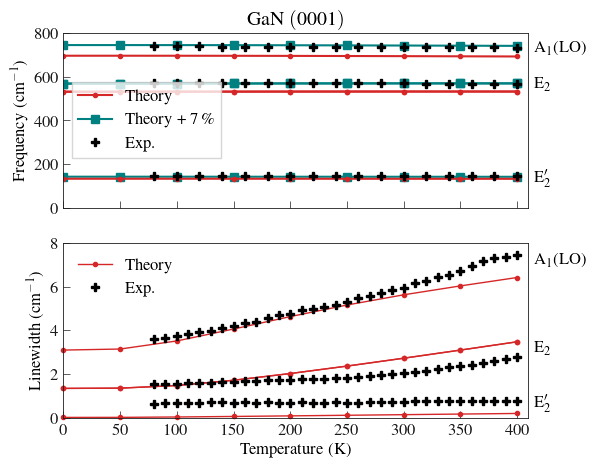

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

ms = 6


# linewidths
ax = axs[1]
for imode in imodes[1:]:
    _df = df[df["mode"] == imode]
    _x, _y = _df.temperature, to_icm * _df.peak_fwhm
    kw = {"color": "C3", "marker": ".", "ms": ms, "lw": 1, "clip_on": False}
    ax.plot(_x, _y, label="Theory" if imode == 1 else None, **kw)

# exp LO
for ii, _df in enumerate([df_LO, df_TO, df_TO_low]):
    kw = {"marker": "P", "ms": ms, "color": "k", "lw": 0}
    ax.plot(_df.temperature_exp, _df.Gamma, label="Exp." if ii == 0 else None, **kw)

ax.set_ylim(0, 8)
ax.set_ylabel("Linewidth (cm$^{-1}$)")
ax.legend(loc=2, frameon=False, markerfirst=True)


# lineshifts
ax = axs[0]
for imode in imodes[1:]:
    _df = df[df["mode"] == imode]
    _x, _y = _df.temperature, to_icm * _df.peak_mid
    kw = {"color": "C3", "marker": ".", "ms": ms, "zorder": 1}
    ax.plot(_x, _y, label="Theory" if imode == 1 else None, **kw)

    kw = {"color": "teal", "marker": "s", "ms": ms, "zorder": 0}
    ax.plot(_x, 1.07 * _y, label=r"Theory + $7\,\%$" if imode == 1 else None, **kw)

# exp LO
for ii, _df in enumerate([df_LO, df_TO, df_TO_low]):
    _x = _df.temperature_exp.iloc[::2]
    _y = _df.x0.iloc[::2]
    kw = {"marker": "P", "ms": ms, "color": "k", "lw": 0, "zorder": 2}
    ax.plot(_x, _y, label="Exp." if ii == 0 else None, **kw)

ax.set_ylabel("Frequency (cm$^{-1}$)")
ax.set_ylim(0, 800)
ax.legend(loc=6, frameon=True, markerfirst=True, fancybox=False)

ax = axs[1]
ax.set_xlabel("Temperature (K)")

axs[0].set_title("GaN $(0001)$")

# put mode labels
ax.set_xlim(0, 410)
ax = axs[0]
ax.text(415, 710, "A$_1$(LO)")
ax.text(415, 550, "E$_2$")
ax.text(415, 120, "E$_2'$")
ax = axs[1]
ax.text(415, 7, "A$_1$(LO)")
ax.text(415, 3, "E$_2$")
ax.text(415, 0.5, "E$_2'$")

file = "plot_lineshifts_and_linewidths_0001.pdf"
fig.savefig(file)
fig.savefig(Path(file).stem + ".png")